### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("../survey_results_public.csv")

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [4]:
df.shape

(89184, 84)

In [5]:
df.isna().sum()

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith                  2044
LanguageWa

### Function to extract countries having atleast 1000 data points.

In [6]:
def countries_to_consider(column_counts, threshold = 1000):
    result = []
    column_list = zip(column_counts.index, column_counts.values)
    for country, count in column_list:
        if count >= threshold:
            result.append(country)
    return result

countries_shortlisted = countries_to_consider(df['Country'].value_counts())

In [7]:
countries_shortlisted

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'France',
 'Poland',
 'Netherlands',
 'Australia',
 'Brazil',
 'Italy',
 'Spain',
 'Sweden',
 'Switzerland',
 'Russian Federation',
 'Czech Republic',
 'Austria']

### Selecting countries with atleast 1000 data points per country

In [8]:
df_new = df[df['Country'].isin(countries_shortlisted)]

In [9]:
df_new.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Heli

----

### Selected the following columns based on intuition:

* MainBranch
* Age
* Employment
* RemoteWork
* EdLevel
* YearsCode
* YearsCodePro
* DevType
* Country
* CompTotal
* ConvertedCompYearly
* WorkExp
* Industry
* Currency
* OrgSize
* ICorPM

In [10]:
required_cols = ['MainBranch', 'Age','Employment','RemoteWork','EdLevel','YearsCode','YearsCodePro', 'DevType','Country','CompTotal','ConvertedCompYearly',
                'WorkExp','Industry','Currency','OrgSize','ICorPM']

df_subset = df_new[required_cols]
df_subset.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,2 to 9 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",United States of America,156000.0,156000.0,7.0,NaN,USD\tUnited States dollar,100 to 499 employees,Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor


In [11]:
df_subset.isna().sum()

MainBranch                 0
Age                        0
Employment                47
RemoteWork              9445
EdLevel                    0
YearsCode                327
YearsCodePro           14536
DevType                 7653
Country                    0
CompTotal              26470
ConvertedCompYearly    26598
WorkExp                31183
Industry               36054
Currency               15194
OrgSize                15387
ICorPM                 31146
dtype: int64

### Naively dropping all the NA entries from the dataframe to see the left over data points

In [12]:
df_final = df_subset.dropna()

In [13]:
df_final.shape

(20195, 16)

In [14]:
df_final.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,2 to 9 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,2 to 9 employees,Individual contributor


In [15]:
df_final.isna().sum()

MainBranch             0
Age                    0
Employment             0
RemoteWork             0
EdLevel                0
YearsCode              0
YearsCodePro           0
DevType                0
Country                0
CompTotal              0
ConvertedCompYearly    0
WorkExp                0
Industry               0
Currency               0
OrgSize                0
ICorPM                 0
dtype: int64

In [16]:
df_final.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,2 to 9 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,2 to 9 employees,Individual contributor


In [17]:
df_final['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          9669
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       5450
Some college/university study without earning a degree                                2276
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         953
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     880
Associate degree (A.A., A.S., etc.)                                                    701
Something else                                                                         195
Primary/elementary school                                                               71
Name: count, dtype: int64

In [18]:
renaming_education_level = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelors',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Masters',
       'Some college/university study without earning a degree' : 'Some College',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)' : 'PhD, Postdoc',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary School',
       'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
       'Primary/elementary school' : 'Primary School',
       'Something else' : 'Something else'}

df_final.loc[:,'EdLevel'] = df_final['EdLevel'].map(renaming_education_level)

In [19]:
def convert_YearsCodePro(experience):
    if experience == 'More than 50 years':
        return 50
    elif experience == 'Less than 1 year':
        return 0.5
    else:
        return float(experience)

def convert_OrgSize(size):
    if size in ['2 to 9 employees', '10 to 19 employees']:
        return 'Less than 20 employees'
    if size == 'Just me - I am a freelancer, sole proprietor, etc.':
        return 'Frelancer/Sole Proprietor'

## Encoding Features

In [20]:
from sklearn.preprocessing import LabelEncoder

## Label Encoding Age
le_age = LabelEncoder()
df_final.loc[:,'Age'] = le_age.fit_transform(df_final['Age'])

## Label Encoding MainBranch
le_MainBranch = LabelEncoder()
df_final.loc[:,'MainBranch'] = le_MainBranch.fit_transform(df_final['MainBranch'])

## Label Encoding Employment status
le_Employment = LabelEncoder()
df_final.loc[:,'Employment'] = le_Employment.fit_transform(df_final['Employment'])

## Label Encoding Work Mode
le_RemoteWork = LabelEncoder()
df_final.loc[:,'RemoteWork'] = le_RemoteWork.fit_transform(df_final['RemoteWork'])

## Ordinal Encoding Education level
education_level_map = {'Primary School' : 0, 'Secondary School' : 1, 'Some College' : 2, 'Associate degree' : 3, 'Something else' : 4,
                       'Bachelors' : 5, 'Masters' : 6, 'PhD, Postdoc' : 7}
df_final.loc[:,'EdLevel'] = df_final['EdLevel'].map(education_level_map)

## Ordinal Encoding Professional Coding Exp
df_final.loc[:,'YearsCodePro'] = df_final['YearsCodePro'].apply(convert_YearsCodePro)

## Label Encoding Developer Title
le_DevType = LabelEncoder()
df_final.loc[:,'DevType'] = le_DevType.fit_transform(df_final['DevType'])

## Label Encoding Country
le_Country = LabelEncoder()
df_final.loc[:,'Country'] = le_Country.fit_transform(df_final['Country'])

## Label Encoding OrgSize
df_final.loc[:,'OrgSize'] = df_final['OrgSize'].apply(convert_OrgSize)
le_OrgSize = LabelEncoder()
df_final.loc[:,'OrgSize'] = le_OrgSize.fit_transform(df_final['OrgSize'])

## Label Encoding ICorPM
le_ICorPM = LabelEncoder()
df_final.loc[:,'ICorPM'] = le_ICorPM.fit_transform(df_final['ICorPM'])

## Label Encoding Industry
df_final.loc[:,'Industry'] = df_final['Industry'].str.replace('Information Services, IT, Software Development, or other Technology',
                                                              'IT/Software Development')
le_Industry = LabelEncoder()
df_final.loc[:,'Industry'] = le_Industry.fit_transform(df_final['Industry'])

In [21]:
df_final.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,0,1,0,2,5,18,9.0,30,16,285000.0,285000.0,10.0,4,USD\tUnited States dollar,1,1
2,0,3,0,0,5,27,23.0,11,16,250000.0,250000.0,23.0,4,USD\tUnited States dollar,2,0
5,0,2,0,2,2,21,21.0,11,15,78000.0,96828.0,22.0,9,GBP\tPound sterling,2,0
6,0,2,0,2,2,4,3.0,15,16,135000.0,135000.0,4.0,4,USD\tUnited States dollar,2,0
12,0,1,0,2,5,10,9.0,15,16,75000.0,75000.0,9.0,9,USD\tUnited States dollar,1,0


In [22]:
df_final = df_final.drop(['YearsCode','Currency','CompTotal'],axis = 1)

In [23]:
df_final.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,ConvertedCompYearly,WorkExp,Industry,OrgSize,ICorPM
1,0,1,0,2,5,9.0,30,16,285000.0,10.0,4,1,1
2,0,3,0,0,5,23.0,11,16,250000.0,23.0,4,2,0
5,0,2,0,2,2,21.0,11,15,96828.0,22.0,9,2,0
6,0,2,0,2,2,3.0,15,16,135000.0,4.0,4,2,0
12,0,1,0,2,5,9.0,15,16,75000.0,9.0,9,1,0


### Helper function to calculate percentile

In [24]:
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'percentile_{:02.0f}'.format(n*100)
    return percentile_

In [25]:
country_compensation_stats = df_final.groupby('Country')['ConvertedCompYearly'].agg({'mean','median','min','max',
                                                                                     percentile(0.25), percentile(0.75), 
                                                                                     percentile(0.90), percentile(0.99)})
country_compensation_stats.index = le_Country.inverse_transform(country_compensation_stats.index)

In [26]:
country_compensation_stats

,min,percentile_99,median,percentile_75,max,percentile_25,mean,percentile_90
Australia,93.0,330520.00,99156.0,118987.0,991559.0,72714.00,105955.321203,152039.0
Austria,4284.0,196187.88,70679.0,85672.0,321269.0,54616.00,76009.757679,116855.8
Brazil,20.0,180000.00,32460.0,51666.5,4451577.0,18259.00,51329.378033,91294.0
Canada,82.0,336603.40,92939.0,124910.0,74351432.0,68403.00,174404.948523,171008.0
Czech Republic,3185.0,218550.98,54592.0,76884.0,272962.0,37782.50,61707.849498,98612.8
France,35.0,187321.33,57038.5,74963.0,642537.0,44978.00,64830.801552,98658.9
Germany,32.0,214179.00,74963.0,92097.0,1069822.0,58926.00,81281.556783,113515.0
India,1.0,145403.00,19387.0,36351.0,424091.0,8724.00,27108.869500,58161.0
Italy,27.0,160727.80,42836.0,58899.0,460485.0,32127.00,50481.188648,80745.4
Netherlands,62.0,261083.92,69608.0,94239.0,942388.0,52474.00,80751.817672,128507.0


In [27]:
country_compensation_stats['percentile_25'].median()

47545.0

In [28]:
country_compensation_stats[['percentile_90','percentile_99']].max()

percentile_90    260000.0
percentile_99    521850.0
dtype: float64

In [29]:
df_final.shape

(20195, 13)

In [30]:
df_model = df_final[(df_final['ConvertedCompYearly'] >= 8724.0) & (df_final['ConvertedCompYearly'] <= 521850.0)]

In [60]:
df_model.shape

(19468, 14)

In [31]:
# Function to categorize each salary into a bucket
def categorize_salary(salary):
    if salary < 50000:
        return '< $50,000'
    elif salary < 75000:
        return '$50,000 - $75,000'
    elif salary < 100000:
        return '$75,000 - $100,000'
    elif salary < 125000:
        return '$100,000 - $125,000'
    elif salary < 150000:
        return '$125,000 - $150,000'
    elif salary < 200000:
        return '$150,000 - 200,000'
    elif salary < 300000:
        return '$200,000 - 300,000'
    elif salary < 450000:
        return '$300,000 - 450,000'
    else:
        return '>= $450,000'

df_model.loc[:,'SalaryBucket'] = df_model['ConvertedCompYearly'].apply(categorize_salary)

In [32]:
df_model['SalaryBucket'].value_counts()

SalaryBucket
$50,000 - $75,000      4111
< $50,000              3912
$75,000 - $100,000     3149
$100,000 - $125,000    2381
$150,000 - 200,000     2287
$125,000 - $150,000    1675
$200,000 - 300,000     1446
$300,000 - 450,000      428
>= $450,000              79
Name: count, dtype: int64

In [33]:
df_model.shape

(19468, 14)

In [34]:
le_target = LabelEncoder()

df_model.loc[:,'SalaryBucket'] = le_target.fit_transform(df_model['SalaryBucket'])

## Checking Feature Associations

In [35]:
from scipy.stats import chi2_contingency, kruskal, f_oneway
from sklearn.preprocessing import LabelEncoder

In [36]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min( (k_corr-1), (r_corr-1)))

In [37]:
nominal_vars = ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'DevType', 'Country', 'Industry', 'OrgSize', 'ICorPM']
for var in nominal_vars:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_model[var], df_model['SalaryBucket']))
    cramers_v_value = cramers_v(df_model[var], df_model['SalaryBucket'])
    print(f"Variable: {var}, Chi-Squared: {chi2}, P-value: {p}, Cramér's V: {cramers_v_value}")
    print("--"*50)

Variable: MainBranch, Chi-Squared: 28.285094961235597, P-value: 0.000422967837302181, Cramér's V: 0.03228008053056391
----------------------------------------------------------------------------------------------------
Variable: Age, Chi-Squared: 2029.7134208709376, P-value: 0.0, Cramér's V: 0.12036774885067696
----------------------------------------------------------------------------------------------------
Variable: Employment, Chi-Squared: 245.88456598801258, P-value: 7.512047321666132e-21, Cramér's V: 0.033420234443052185
----------------------------------------------------------------------------------------------------
Variable: RemoteWork, Chi-Squared: 1066.888613835382, P-value: 5.260171239272395e-217, Cramér's V: 0.16429517800038929
----------------------------------------------------------------------------------------------------
Variable: DevType, Chi-Squared: 1287.334113857844, P-value: 5.959731052262861e-137, Cramér's V: 0.08139177429113512
-----------------------------

In [38]:
continuous_vars = ['YearsCodePro', 'WorkExp']
for var in continuous_vars:
    groups = [df_model[df_model['SalaryBucket'] == label][var] for label in df_model['SalaryBucket'].unique()]
    if all(group.dropna().apply(lambda x: np.abs(x - np.mean(x)) < 3*np.std(x)).all() for group in groups):
        # ANOVA Test
        f_val, p_val = f_oneway(*groups)
        print(f"Variable: {var}, ANOVA Test: F-value: {f_val}, P-value: {p_val}")
    else:
        # Kruskal-Wallis Test
        h_val, p_val = kruskal(*groups)
        print(f"Variable: {var}, Kruskal-Wallis Test: H-value: {h_val}, P-value: {p_val}")
    print("--"*50)

Variable: YearsCodePro, Kruskal-Wallis Test: H-value: 2608.47188928684, P-value: 0.0
----------------------------------------------------------------------------------------------------
Variable: WorkExp, Kruskal-Wallis Test: H-value: 2580.175085706775, P-value: 0.0
----------------------------------------------------------------------------------------------------


In [39]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
spearman_corr, spearman_pvalue = spearmanr(df_model['EdLevel'], df_model['SalaryBucket'])

print(f"Spearman's Rank Correlation: {spearman_corr}, P-value: {spearman_pvalue}")

Spearman's Rank Correlation: -0.02496383638161375, P-value: 0.0004949628191706243


### Train and Test splits

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_model.drop(['SalaryBucket','ConvertedCompYearly'],axis = 1)
y = df_model['SalaryBucket']
y = y.astype('int')

In [42]:
X.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,WorkExp,Industry,OrgSize,ICorPM
1,0,1,0,2,5,9.0,30,16,10.0,4,1,1
2,0,3,0,0,5,23.0,11,16,23.0,4,2,0
5,0,2,0,2,2,21.0,11,15,22.0,9,2,0
6,0,2,0,2,2,3.0,15,16,4.0,4,2,0
12,0,1,0,2,5,9.0,15,16,9.0,9,1,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [44]:
X_train.shape

(15574, 12)

In [45]:
X_test.shape

(3894, 12)

## Modeling

#### Helper functions to fit the model, compute the results and feature importances.

In [46]:
def fit_and_compute_results(model):
    model.fit(X_train,y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"Training Accuracy is : {accuracy_score(y_train,y_pred_train)}\n")
    print(f"Testing Accuracy is : {accuracy_score(y_test,y_pred)}\n")
    print("--" * 50)
    
    print(f"Classification report w.r.t the train set:\n {classification_report(y_train,y_pred_train)}\n")
    print("--" * 50)
    print(f"Classification report w.r.t the test set:\n {classification_report(y_test,y_pred)}\n")

In [47]:
def plot_feature_importances(model):
    plt.figure(figsize = (6,4))
    feature_importances_df = pd.DataFrame({'features' : X.columns,
                                    'feature_importances' : model.feature_importances_}).sort_values('feature_importances',ascending=False)
    sns.barplot(data = feature_importances_df, y = 'features', x = 'feature_importances', hue = 'feature_importances')
    plt.show()

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
fit_and_compute_results(lr)

Training Accuracy is : 0.2973545653011429

Testing Accuracy is : 0.29994863893168977

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.11      0.00      0.00      1905
           1       0.00      0.00      0.00      1340
           2       0.25      0.65      0.36      1830
           3       0.22      0.04      0.07      1157
           4       0.00      0.00      0.00       342
           5       0.27      0.38      0.32      3289
           6       0.20      0.11      0.14      2519
           7       0.41      0.59      0.48      3129
           8       0.00      0.00      0.00        63

    accuracy                           0.30     15574
   macro avg       0.16      0.20      0.15     15574
weighted avg       0.23      0.30      0.24     15574


---------------------------------------------------------------

#### DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
fit_and_compute_results(tree)

Training Accuracy is : 0.9675741620649801

Testing Accuracy is : 0.3376990241397021

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1905
           1       0.95      0.96      0.95      1340
           2       0.93      0.95      0.94      1830
           3       0.96      0.92      0.94      1157
           4       0.96      0.89      0.92       342
           5       0.98      0.99      0.98      3289
           6       1.00      0.96      0.98      2519
           7       1.00      0.99      0.99      3129
           8       1.00      0.92      0.96        63

    accuracy                           0.97     15574
   macro avg       0.97      0.95      0.96     15574
weighted avg       0.97      0.97      0.97     15574


----------------------------------------------------------------

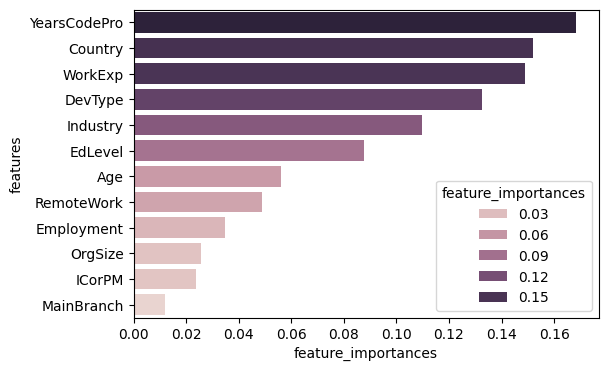

In [50]:
plot_feature_importances(tree)

#### RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
fit_and_compute_results(rf)

Training Accuracy is : 0.9675741620649801

Testing Accuracy is : 0.37057010785824346

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1905
           1       0.96      0.94      0.95      1340
           2       0.92      0.96      0.94      1830
           3       0.94      0.94      0.94      1157
           4       0.94      0.91      0.92       342
           5       0.98      0.98      0.98      3289
           6       0.98      0.97      0.98      2519
           7       0.99      0.99      0.99      3129
           8       0.92      0.97      0.95        63

    accuracy                           0.97     15574
   macro avg       0.96      0.96      0.96     15574
weighted avg       0.97      0.97      0.97     15574


---------------------------------------------------------------

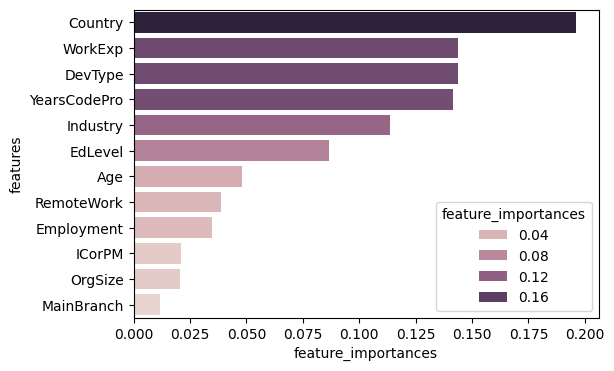

In [52]:
plot_feature_importances(rf)

#### AdaBoost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100, algorithm="SAMME")
fit_and_compute_results(ada_boost)

Training Accuracy is : 0.3284320020547066

Testing Accuracy is : 0.3192090395480226

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.25      0.08      0.12      1905
           1       0.00      0.00      0.00      1340
           2       0.31      0.65      0.42      1830
           3       0.24      0.08      0.12      1157
           4       0.00      0.00      0.00       342
           5       0.34      0.57      0.43      3289
           6       0.27      0.27      0.27      2519
           7       0.43      0.36      0.39      3129
           8       0.00      0.00      0.00        63

    accuracy                           0.33     15574
   macro avg       0.20      0.22      0.19     15574
weighted avg       0.29      0.33      0.29     15574


----------------------------------------------------------------

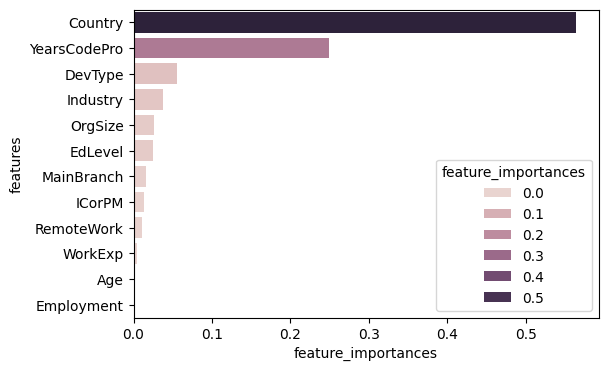

In [54]:
plot_feature_importances(ada_boost)

#### Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

fit_and_compute_results(gbc)

Training Accuracy is : 0.4529985873892385

Testing Accuracy is : 0.42424242424242425

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.30      0.18      0.23      1905
           1       0.34      0.08      0.13      1340
           2       0.35      0.61      0.44      1830
           3       0.39      0.26      0.31      1157
           4       0.45      0.03      0.05       342
           5       0.46      0.63      0.53      3289
           6       0.35      0.33      0.34      2519
           7       0.69      0.73      0.71      3129
           8       0.33      0.02      0.03        63

    accuracy                           0.45     15574
   macro avg       0.41      0.32      0.31     15574
weighted avg       0.44      0.45      0.43     15574


---------------------------------------------------------------

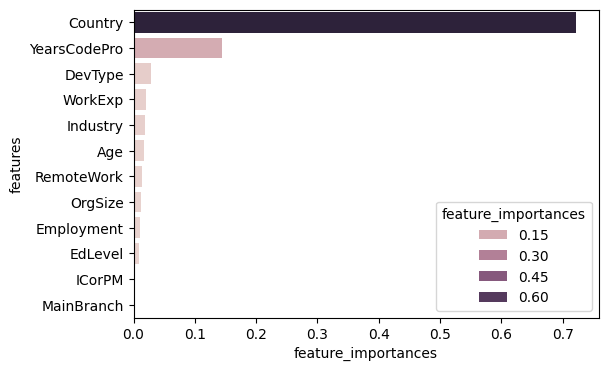

In [56]:
plot_feature_importances(gbc)

#### Support Vector Machine Classifier

In [57]:
from sklearn.svm import SVC

svm_classifier = SVC(gamma = 'auto')

fit_and_compute_results(svm_classifier)

Training Accuracy is : 0.6401053037113137

Testing Accuracy is : 0.3515665125834617

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56      1905
           1       0.74      0.35      0.48      1340
           2       0.49      0.77      0.60      1830
           3       0.66      0.49      0.56      1157
           4       1.00      0.11      0.20       342
           5       0.64      0.74      0.68      3289
           6       0.64      0.64      0.64      2519
           7       0.75      0.79      0.77      3129
           8       1.00      0.05      0.09        63

    accuracy                           0.64     15574
   macro avg       0.73      0.49      0.51     15574
weighted avg       0.66      0.64      0.63     15574


----------------------------------------------------------------

### Inspecting the Schema

In [58]:
schema_df = pd.read_csv('../survey_results_schema.csv')

In [59]:
schema_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
